In [ ]:
1. buat scatter plot dari numerik & nilai korelasinya
2. tentukan apakah ada korelasinya antara var reqiment & company menggunakan chisquare test

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['infantry', 'infantry', 'cavalry', 'cavalry', 'infantry', 'infantry', 'cavalry', 'cavalry','infantry', 'infantry', 'cavalry', 'cavalry'], 
        'experience': ['veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie','veteran', 'rookie', 'veteran', 'rookie'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'experience', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,experience,name,preTestScore,postTestScore
0,Nighthawks,infantry,veteran,Miller,4,25
1,Nighthawks,infantry,rookie,Jacobson,24,94
2,Nighthawks,cavalry,veteran,Ali,31,57
3,Nighthawks,cavalry,rookie,Milner,2,62
4,Dragoons,infantry,veteran,Cooze,3,70
5,Dragoons,infantry,rookie,Jacon,4,25
6,Dragoons,cavalry,veteran,Ryaner,24,94
7,Dragoons,cavalry,rookie,Sone,31,57
8,Scouts,infantry,veteran,Sloan,2,62
9,Scouts,infantry,rookie,Piger,3,70


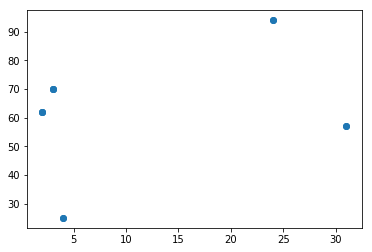

In [11]:
corr = plt.scatter(df.preTestScore, df.postTestScore)

In [14]:
df.corr()

,preTestScore,postTestScore
preTestScore,1.000000,0.330443
postTestScore,0.330443,1.000000


In [19]:
TestScore = pd.crosstab(df.preTestScore, df.postTestScore, margins = True)
TestScore

postTestScore,25,57,62,70,94,All
preTestScore,,,,,,
2,0,0,3,0,0,3
3,0,0,0,3,0,3
4,2,0,0,0,0,2
24,0,0,0,0,2,2
31,0,2,0,0,0,2
All,2,2,3,3,2,12


### membuat matrix observed

In [21]:
observed = TestScore.iloc[:-1,:-1]
observed

postTestScore,25,57,62,70,94
preTestScore,,,,,
2,0,0,3,0,0
3,0,0,0,3,0
4,2,0,0,0,0
24,0,0,0,0,2
31,0,2,0,0,0


### membuat matrix expected

In [ ]:
expected = np.outer(TestScore.iloc[-1][:-1])
expected = pd.DataFrame(expected)

#chisquare -> 0 tidak berkorelasi karna < dr Critical Value

LIMIT(Y) - RATING (X)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import scipy.stats as stats
from sklearn import linear_model

credit = pd.read_csv("Credit.csv", index_col=0)
credit.head(3)
 
X = credit['Rating']
Y = credit['Limit']

X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)

In [26]:
# Split data menjadi training/testing sets
X_train = X[:-150]
X_test = X[-150:]
 
# Split targets menjadi training/testing sets
Y_train = Y[:-150]
Y_test = Y[-150:]
X_train.shape

(250, 1)

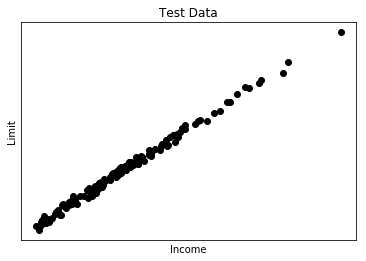

In [29]:
# Scatter plot
plt.scatter(X_test, Y_test,  color='black')
plt.title('Test Data')
plt.xlabel('Income')
plt.ylabel('Limit')
plt.xticks(())
plt.yticks(())
 
plt.show()

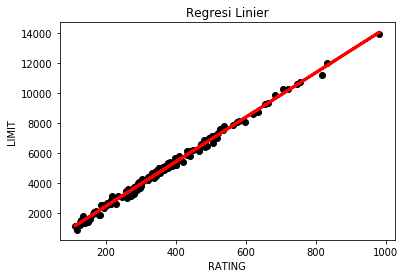

In [30]:
# Membuat obyek regresi linear
regr = linear_model.LinearRegression()
 
# Train model menggunakan training sets
regr.fit(X_train, Y_train)
 
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('Regresi Linier')
plt.xlabel('RATING')
plt.ylabel('LIMIT')

plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)

plt.show()

In [31]:
print(regr.predict(np.array([[150]])))

[[1686.06477239]]


In [32]:
regr.coef_ #coefficient

array([[14.85097126]])

In [33]:
regr.intercept_#kalo nilai xnya = 0 , maka y=interceptper

array([-541.58091592])

In [ ]:
#MODEL TRAINING
Y = 14.8.X+(-541)

#NUMERIK = KATEGORIK , korelasinya:
-terlihat dalam visualisasi (boxplot)
- kalo kategorinya berubah ada perubahan juga dalam nilai y nya